#Student Name: Ash Hoskins,#S559245 <br />
#Course: CSIS 44-609 - Data Analytics Fundamentals <br />
#Professor Denise Case <br />
#Domain: Geospatial Data Module 6 Project Date: 2/20/2023<br />

Reference Link for USGS Data used in this program: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php for the Live Version https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv<br />
Brief Description: This program reads in csv data from the Monthly Earthquake hazard program results and displays all detectable seizmic activity throughout the world for the last 30 days. <br />
<br />Task 1 Requirements:
1. Use Statistics mean, median, mode, std dev, variance
2. built-in functions min, max, len, count of records, number of columns
3. Get Data into a list
4. Use filter, map and list comprehensions to clean and transform data
5. use pandas
6. use matplotlib
7. Strive to tell a story

<br />Task 3 Requirements:
1. Use everything you've learned to conduct a unique data exploration project using some information related to your domain. 
2. Tell a story with data (do a web search to learn more).
3. Use this project to feature all of the key skills learned - creating a professional notebook, writing a good README.md (do a web search). 
4. Include challenging Python programming aspects - find a reason to use filter(), map(), and list comprehensions.
5. Have fun and make it unique.

<br />Optional Task 5. Bonus
1. As part of your second project, include a new library or module we won't have time to explore. 
2. Consider imageio, nltk, texatistic, textblob, wordcloud, or others. 
3. Basically, look for something that might interest you and see if you can learn it on your own and apply it to your domain/project. 
4. Clearly label your project as the bonus and explain your data question, your module, and your results. 

In [35]:
#Importing of necessary libraries for the program. #Optional Task 5 Requirement #1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [36]:
#Place csv data into a dataframe. Requirement #5 on Task 1
df = pd.read_csv('MonthEQ.csv')

In [37]:
#Quick way of finding meaningful statistics of a dataframe Requirement #1 on Task 1
df.describe()

,latitude,longitude,depth,mag
count,10517.000000,10517.000000,10517.000000,10517.000000
mean,42.524390,-116.387831,25.056893,1.620490
std,18.532749,67.211486,52.859903,1.284953
min,-59.407800,-179.968900,-3.500000,-1.230000
25%,35.509333,-152.810500,2.910000,0.800000
50%,38.838165,-122.819000,8.400000,1.320000
75%,58.251333,-116.750167,23.440000,2.060000
max,84.881800,179.984000,639.011000,7.800000


In [51]:
#Data frame variance display Task 1 Requirement #1
df.var()

C:\Users\Hoski\AppData\Local\Temp\ipykernel_1912\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


latitude      343.462790
longitude    4517.383880
depth        2794.169294
mag             1.651104
dtype: float64

### Some of the information that can be gathered from the USGS 30 day Earthquake hazard program is the following information: 

In [52]:
#Displays relevent information about the built in functions of the data while providing relevent geospatial information. Requirement #2 on Task 1
print("Earthquakes are measured on a logarithmic scale based on seismic signals, a negative result means it can't be felt by humans")
print()
zed = (df.loc[df['mag'] == df['mag'].max()])
print("The Largest Magnitude Earthquake recorded in the last 30 days was at a mag of: ", df['mag'].max())
print("Which is located approximately: ", zed.iat[0,5])
print()
zed = (df.loc[df['mag'] == df['mag'].min()])
print("The Largest Magnitude Earthquake recorded in the last 30 days was at a mag of: ", df['mag'].min())
print("Which is located approximately: ", zed.iat[0,5])
print()
print("Within the last 30 days there are currently: ", len(df.index), "recorded seizmic activities worldwide")
print()
col = df.columns
print("Although unrelevent data has been removed from the csv there exists: ", len(col), " number of columns")


Earthquakes are measured on a logarithmic scale based on seismic signals, a negative result means it can't be felt by humans

The Largest Magnitude Earthquake recorded in the last 30 days was at a mag of:  7.8
Which is located approximately:  26 km ENE of Nurdağı, Turkey

The Largest Magnitude Earthquake recorded in the last 30 days was at a mag of:  -1.23
Which is located approximately:  60 km ENE of Pedro Bay, Alaska

Within the last 30 days there are currently:  10517 recorded seizmic activities worldwide

Although unrelevent data has been removed from the csv there exists:  6  number of columns


### This is a histogram  from the USGS data showing all the seizmic acitivty in the last 30 days in the world. Tremors that are displayed to the left of the red line cannot be felt by humans.

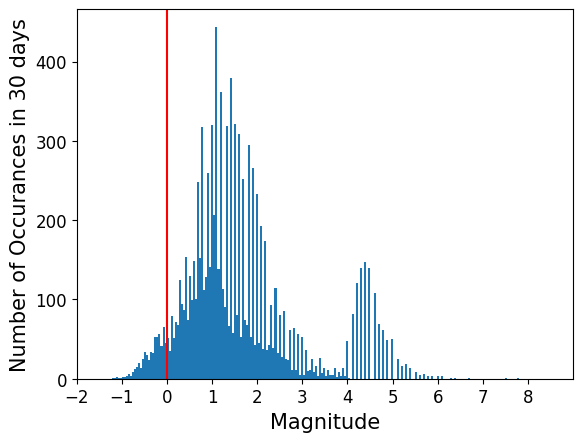

In [53]:
#Use matplot lib to display histogram of relevent data Requirement #6 Task 1
df['mag'].hist(bins = 200, grid = False, xlabelsize= 12, ylabelsize= 12)
plt.xlabel("Magnitude", fontsize = 15)
plt.ylabel("Number of Occurances in 30 days", fontsize = 15)
plt.xticks([-2,-1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlim(-2, 9)
plt.axvline(0, c = 'red')



### The following map displays all relevent seizmic data gathered by the USGS throughout the world. The global map shows 3 icons depending on severity. Red Squares are magnitude of 5 or higher, Green triangles are less than 5 magnitude but can be felt by humans (greater than zero), and the blue squares are tiny in the map because the tremours cannot be felt by humans.

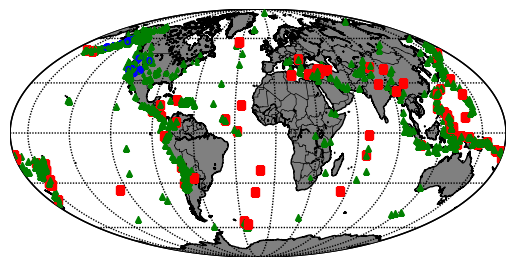

In [54]:
#Basemap creation criteria, centralized lat/lon on Atlantic Ocean. Draw Meridians and Paralells, coats lines, countries lines. For loop sets marker size based on magniture from dataframe
#This is created as method to be used for further tasks.  #x, y = worldmap(df["latitude"] ,df["longitude"]) Testing commented out for continuity of magnitude size.
def worldmap(data):
    worldmap = Basemap(projection='moll', resolution = 'l', area_thresh = 1000.0,
              lat_0=10, lon_0=-13)
    worldmap.drawcoastlines()
    worldmap.drawcountries()
    worldmap.fillcontinents(color = 'gray')
    worldmap.drawmapboundary()
    worldmap.drawmeridians(np.arange(0, 360, 30))
    worldmap.drawparallels(np.arange(-90, 90, 30))
    
# For loop used to set marker size on the Basemap equal to the magnitude of the measurement. 
    for longitude, latitude, mag in zip(data['longitude'], data['latitude'], data['mag']):
        if mag > 5:
            min_marker_size = mag
            x,y = worldmap(longitude, latitude)
            worldmap.plot(x, y, 'rs', markersize = min_marker_size)
        elif mag < 0:
            min_marker_size = 3
            x,y = worldmap(longitude, latitude)
            worldmap.plot(x, y, 'bs', markersize = min_marker_size)
        else:
            min_marker_size = mag
            x,y = worldmap(longitude, latitude)
            worldmap.plot(x, y, 'g^', markersize = min_marker_size)
            


plt.show(worldmap(df))



### On Feburary 6th of 2023 the people of Turkey experienced extreme seizmic acitivity along their fault lines. There was numerous eartquakes in a short period of time, the largest being 7.8 magnitude. This map shows all the earthquakes recorded in this area for the last 30 days. The chart displays the top 20 magnitudes in Turkey from the same data.

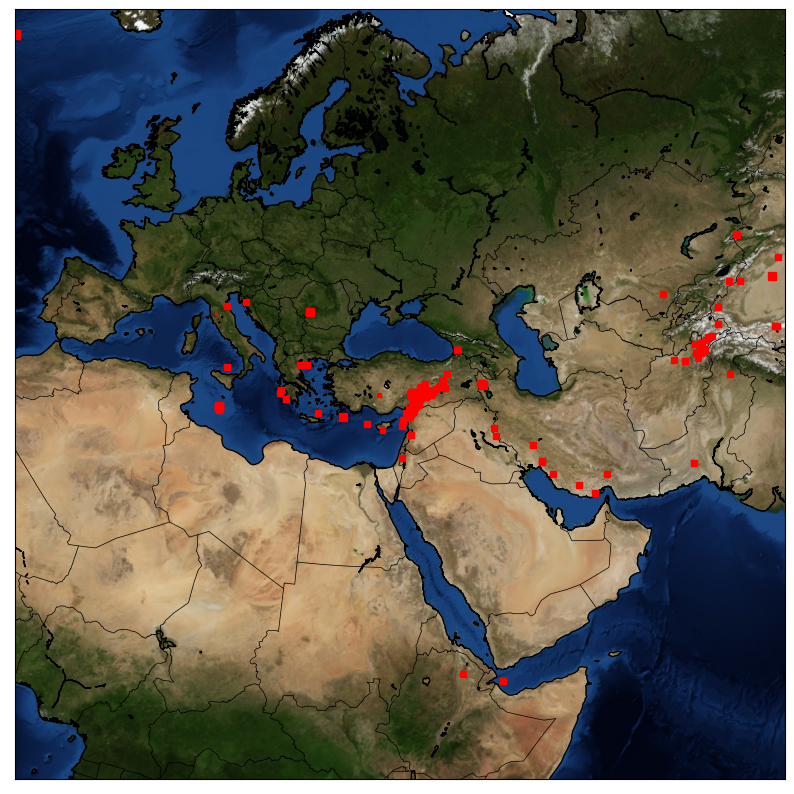

In [55]:
#Basemap of Europe, North Africa, Middle-East Centralized on Turkey and showing all the different earthquakes in the last 30 days.
plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='i',
            width=8E6, height=8E6, 
            lat_0=38, lon_0=35,)

m.drawcoastlines()
m.drawcountries()


for longitude, latitude, mag in zip(df['longitude'], df['latitude'], df['mag']):            
            x,y =  m(longitude, latitude)
            m.plot(x, y, 'rs', markersize = mag)

m.bluemarble()




In [56]:
#Top 20 filter for USGS Reported Earthquakes in Turkey. Task 1 Requirement #4, Task 3 Requirment #4
zx = df.loc[(df['place'].str.contains("Turkey")) & (df['mag'] >= 5 )]
zx.nlargest(20, 'mag')


,time,latitude,longitude,depth,mag,place
4974,2023-02-06T01:17:34.362Z,37.2251,37.0209,10.000,7.8,"26 km ENE of Nurdağı, Turkey"
4823,2023-02-06T10:24:49.258Z,38.0235,37.2030,10.000,7.5,"4 km SSE of Ekinözü, Turkey"
4971,2023-02-06T01:28:15.984Z,37.1784,36.9468,10.708,6.7,"18 km E of Nurdağı, Turkey"
103,2023-02-20T17:04:29.441Z,36.1094,36.0165,16.000,6.3,"3 km SSW of Uzunbağ, Turkey"
4791,2023-02-06T12:02:11.825Z,38.0605,36.5370,10.000,6.0,Central Turkey
4822,2023-02-06T10:26:48.486Z,38.0302,37.9636,20.094,6.0,"10 km SE of Doğanşehir, Turkey"
4820,2023-02-06T10:35:58.653Z,38.0084,37.7505,10.000,5.8,"13 km SW of Doğanşehir, Turkey"
4818,2023-02-06T10:51:30.942Z,38.1236,38.0529,12.336,5.7,"16 km ENE of Doğanşehir, Turkey"
4973,2023-02-06T01:26:50.760Z,37.2241,36.9749,10.000,5.7,central Turkey
4969,2023-02-06T01:36:27.357Z,36.9921,36.6832,10.000,5.6,"19 km SE of Hasanbeyli, Turkey"


### This portion of the program will gather live data from the USGS website and display information pertaining to any data involving seizmic activity in the World for the last 24 hours, then display it on the world map.

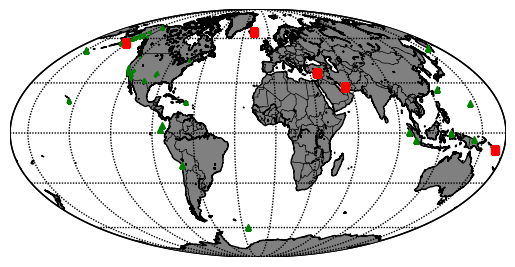

In [70]:
#Reads the live data and plots it on the method world map
live = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_day.csv')
plt.show(worldmap(live))

In [71]:
#drops unused columns and displays top 20 magnitudes from the Live dataframe
print("The Most Severe activity in the last 24 hours is as follows: ")
sx = live.drop(columns = ['depth', 'magType','nst','gap','dmin','rms','net','id','updated', 
'type','horizontalError','depthError',	'magError',	'magNst','status','locationSource',	'magSource'])

sx.nlargest(20, 'mag')


The Most Severe activity in the last 24 hours is as follows: 


,time,latitude,longitude,mag,place
130,2023-02-20T17:04:29.441Z,36.1094,36.0165,6.3,"3 km SSW of Uzunbağ, Turkey"
129,2023-02-20T17:07:35.745Z,36.1491,35.9086,5.5,"11 km W of Uzunbağ, Turkey"
57,2023-02-21T05:35:23.601Z,56.8447,-153.0740,5.4,"42 km SSE of Old Harbor, Alaska"
56,2023-02-21T06:05:36.653Z,27.7648,55.3612,5.3,"111 km NW of Bandar Abbas, Iran"
46,2023-02-21T08:41:04.323Z,64.7154,-17.5759,5.1,"110 km SSE of Akureyri, Iceland"
123,2023-02-20T17:53:33.971Z,-9.8286,160.2368,5.1,"53 km SE of Honiara, Solomon Islands"
67,2023-02-21T02:54:01.133Z,-59.3594,-24.0663,5.0,South Sandwich Islands region
61,2023-02-21T03:51:29.991Z,2.6083,-84.4713,4.9,off the coast of Central America
105,2023-02-20T20:13:51.210Z,-4.3832,102.1932,4.9,"64 km S of Bengkulu, Indonesia"
109,2023-02-20T19:19:22.838Z,4.5817,-82.8567,4.9,south of Panama
